# Hands-On Machine Learning with Scikit-Learn
https://www.amazon.fr/dp/B07XGF2G87
![hands-on-ML.png](images/hands-on-ML.png)

### Full book
https://www.lpsm.paris/pageperso/has/source/Hand-on-ML.pdf
### Notebook examples
https://github.com/ageron/handson-ml

# Why use machine learning

Consider how you would write a spam filter using traditional programming techniques:
![traditional-approach.png](images/traditional-approach.png)
![ml-approach.png](images/ml-approach.png)
![auto-adapting.png](images/auto-adapting.png)
![human-learning.png](images/human-learning.png)

# Types of Machine Learning Systems

## Supervised Learning

![spam-classif.png](images/spam-classif.png)
![regr.png](images/regr.png)

## Unsupervised learning

![unlabeled.png](images/unlabeled.png)
![clustering.png](images/clustering.png)
![t-sne.png](images/t-sne.png)
![anomaly.png](images/anomaly.png)

## Semisupervised Learning

![semisupervised.png](images/semisupervised.png)

## Reinforcement Learning

![reinforcement.png](images/reinforcement.png)

## Online Learning

![online1.png](images/online1.png)
![online2.png](images/online2.png)

# Instance-based versus Model-based learning

## Instance-based

![instance-based.png](images/instance-based.png)

## Model-based learning

![model-based.png](images/model-based.png)

### Better Life Index

For example, suppose you want to know if money makes people happy, so you download the *Better Life Index* data from the [OECD’s website](https://stats.oecd.org/index.aspx?DataSetCode=BLI) as well as stats about GDP
per capita from the [IMF’s website](https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512,668,914,672,612,946,614,137,311,962,213,674,911,676,193,548,122,556,912,678,313,181,419,867,513,682,316,684,913,273,124,868,339,921,638,948,514,943,218,686,963,688,616,518,223,728,516,558,918,138,748,196,618,278,624,692,522,694,622,142,156,449,626,564,628,565,228,283,924,853,233,288,632,293,636,566,634,964,238,182,662,453,960,968,423,922,935,714,128,862,611,135,321,716,243,456,248,722,469,942,253,718,642,724,643,576,939,936,644,961,819,813,172,199,132,733,646,184,648,524,915,361,134,362,652,364,174,732,328,366,258,734,656,144,654,146,336,463,263,528,268,923,532,738,944,578,176,537,534,742,536,866,429,369,433,744,178,186,436,925,136,869,343,746,158,926,439,466,916,112,664,111,826,298,542,927,967,846,443,299,917,582,544,474,941,754,446,698,666&s=NGDPDPC&grp=0&a)

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


In [7]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [8]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

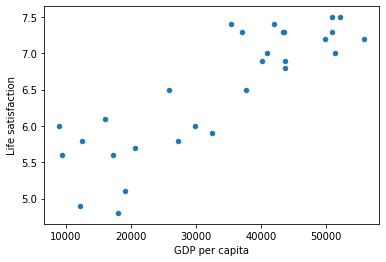

In [9]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [27]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

t1 = model.coef_[0][0]
t0 = model.intercept_[0]

t1,t0

(4.911544589158483e-05, 4.853052800266436)

In [14]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


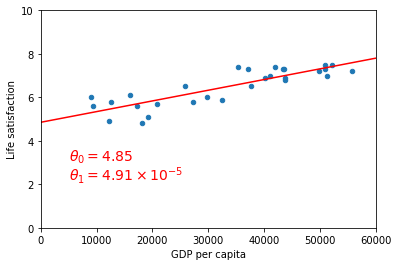

In [32]:
# Plot outputs
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "r")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="r")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="r")

plt.show()

In [17]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


## Working with Real Data

* Popular open data repositories:
— [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
— [Kaggle datasets](https://www.kaggle.com/datasets)
— [Amazon’s AWS datasets](https://registry.opendata.aws/)
* Meta portals (they list open data repositories):
— http://dataportals.org/
— http://opendatamonitor.eu/
— http://quandl.com/
* Other pages listing many popular open data repositories:
— [Wikipedia’s list of Machine Learning datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
— [Quora.com question](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
— [Datasets subreddit](https://www.reddit.com/r/datasets/)

![calpop.png](images/calpop.png)